<a href="https://colab.research.google.com/github/kim-daehyun/study_trace/blob/Computer-Statistics/06_Paired_t_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from scipy import stats
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
%matplotlib inline

#Example

In [7]:
# Here are two samples that are related (paired).

sample1 = [ 0.46654953,  8.58344094,  6.2226718 ,  4.02623735, -0.28971343,
        2.23459591, -0.70380069,  6.1613344 , -2.01381234,  6.7876989 ,
        2.70165845,  1.07331893,  3.09908613,  1.62977907, -1.4020262 ,
        3.28549113,  5.88489172, -2.98195997,  8.02642372,  2.57072504,
        2.19463139,  2.880722  ,  2.56419551,  5.57418017,  2.36137833,
        4.02824538,  1.34360523,  1.26047755,  2.68235402,  5.68823028]

sample2 = [5.04382364, 5.77158757, 5.71542933, 3.47266062, 1.46869544,
       5.48405734, 5.52707135, 4.59739957, 5.15823101, 1.97986375,
       3.68646085, 5.13720215, 4.73987354, 4.13524575, 2.87537463,
       4.80392496, 5.60067725, 3.16642891, 7.14302231, 4.31380693,
       3.98904512, 3.82204847, 5.05015666, 2.49548964, 1.85192112,
       2.76668768, 2.02110967, 2.72668766, 4.85810735, 4.92663154]

sample1_mean = np.mean(sample1)
sample1_std = np.std(sample1 , ddof = 1)
print("sample1:")
print("Mean : {}".format(sample1_mean))
print("Std : {}".format(sample1_std))


sample2_mean = np.mean(sample2)
sample2_std = np.std(sample2 , ddof = 1)
print("\nsample2:")
print("Mean : {}".format(sample2_mean))
print("Std : {}".format(sample2_std))

# Let's check the significance of the difference by the two-sample t-test.

sample1:
Mean : 2.8646870083333336
Std : 2.875776806687275

sample2:
Mean : 4.144290727
Std : 1.405821355255595


# Step 2. Calculate a test statistic

In [13]:
# Difference between pairs
sample_diff = [s1 - s2 for s1, s2 in zip(sample1, sample2)]

# t = sample_error / std_error
sample_error = np.mean(sample_diff) - 0      # (sample_dff_mean - 0)
standard_error = np.std(sample_diff, ddof =1) / np.sqrt(len(sample_diff))

t = sample_error/standard_error

print('Test statistict : {}'.format(t))

Test statistict : -2.49919496328387


# Step 3. Check how likely the test statistic can be obtained.

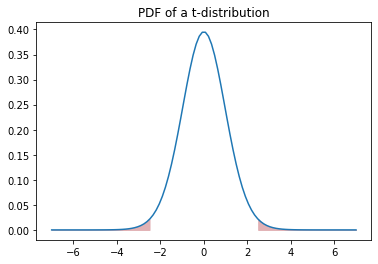

In [25]:
# The t-statistic follows t-distribution.
# The t-distribution is described by DF of a sample.
t_dist = stats.t(df = len(sample_diff)-1)
x = np.linspace(-7, 7, 100)
y = t_dist.pdf(x)
plt.plot(x,y)
plt.title("PDF of a t-distribution")

# Fill the area of the values to be 
# as extreme as or more extreme than the test statistic. (p-value)
right_interval = np.linspace(abs(t), x[-1], 50)
left_interval = np.linspace(-x[-1], -abs(t),  50)
plt.fill_between(right_interval,  t_dist.pdf(right_interval) , color='#e1b1b4', alpha=1)
plt.fill_between(left_interval,  t_dist.pdf(left_interval) , color='#e1b1b4', alpha=1)

In [30]:
# Calculate the p-value.
p, _ = integrate.quad(t_dist.pdf, left_interval[0], left_interval[-1]) #  Arg: function, from_value, to_value 
p *= 2 # two-tailed

print("The p-value for this test: {}".format(p))

The p-value for this test: 0.01835935408843935


In [31]:
# Conclusion (Significance level = 5%)
if p < 0.05:
  print("Reject H0: The population mean is not equal to 4.5.")
else:
  print("Accept H0: The population mean is 4.5.")

Reject H0: The population mean is not equal to 4.5.


##### [Additional] You can calculate the p-value by the SF. 

In [32]:
p = t_dist.sf( abs(t) ) * 2
print("p-value : {0}".format(p))

p-value : 0.018359461091154692


##### [Additional] You can use critical values.

In [34]:
cv = t_dist.ppf(.975)
print("Critical values(alpha = 0.05) : -{0}, {0}".format(cv))

# If the test statistic is beyond the critical values, 
# we should reject the null hypothesis.

Critical values(alpha = 0.05) : -2.045229642132703, 2.045229642132703


### Or you can use codes in the 'stats' module.


In [35]:
t_, p_ = stats.ttest_1samp(sample_diff, 0 )
print("Test statistic t: {}".format(t_))
print("p-value: {}".format(p_))

Test statistic t: -2.49919496328387
p-value: 0.018359461091154692


# (Step 4) Calculate the effect size

In [36]:
# The effect size for two-sample t-test is cohen's d.
# d = | sample_diff_mean - 0 | / sample_diff_std

d = abs(np.mean(sample_diff) - 0) / np.std(sample_diff)

print("Effect size: {}".format(d))

Effect size: 0.46408885387738297
